In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_excel('btc_processed_data.xlsx')
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7661247975
1,2019-03-02,3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076
2,2019-03-03,3862.266113,3875.483643,3836.905762,3847.175781,3847.175781,7253558152
3,2019-03-04,3845.091553,3867.381836,3733.749756,3761.557129,3761.557129,9029175788
4,2019-03-05,3759.832520,3903.916748,3745.183105,3896.375000,3896.375000,10174126415
...,...,...,...,...,...,...,...
1914,2024-05-27,68512.179688,70597.882812,68232.500000,69394.554688,69394.554688,25870990717
1915,2024-05-28,69392.195312,69514.640625,67227.156250,68296.218750,68296.218750,32722265965
1916,2024-05-29,68296.351562,68852.460938,67101.492188,67578.093750,67578.093750,26707072906
1917,2024-05-30,67576.085938,69500.539062,67118.078125,68364.992188,68364.992188,29509712534


In [2]:
# 3. Chia train test validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))
test_size = len(df) - train_size
train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
# 4. Preprocess data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

In [5]:
# 5. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


In [6]:
# 6. Training process
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [7]:
# 7. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [8]:
# 8. Evaluate model accuracy with RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f"Testing RMSE: {test_rmse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing MAPE: {test_mape}%")

Testing RMSE: 19042.071778437024
Testing MAE: 15563.087955322191
Testing MAPE: 25.199810157347592%


In [9]:
#Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
last_30_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# Create a new dataframe with the predicted closing prices
df_next_30_days = pd.DataFrame(y_next_30_days, index=last_30_data, columns=['Close'])

# Print the dataframe
print(df_next_30_days)

#Quá trình tạo index predict 60 ngày tiếp theo
last_index = last_30_data[-1]
last_60_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Create a new dataframe with the predicted closing prices
df_next_60_days = pd.DataFrame(y_next_60_days, index=last_60_data, columns=['Close'])

# Print the dataframe
print(df_next_60_days)

#Quá trình tạo index predict 90 ngày tiếp theo
last_index = last_60_data[-1]
last_90_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# Create a new dataframe with the predicted closing prices
df_next_90_days = pd.DataFrame(y_next_90_days, index=last_90_data, columns=['Close'])

# Print the dataframe
print(df_next_90_days)




Predicted closing prices for the next 30 days:
[40777.63466354 40792.65390271 40807.67314187 40822.69238104
 40837.71162021 40852.73085938 40867.75009854 40882.76933771
 40897.78857688 40912.80781604 40927.82705521 40942.84629438
 40957.86553354 40972.88477271 40987.90401188 41002.92325104
 41017.94249021 41032.96172938 41047.98096854 41063.00020771
 41078.01944688 41093.03868604 41108.05792521 41123.07716438
 41138.09640354 41153.11564271 41168.13488188 41183.15412104
 41198.17336021 41213.19259938]
             Close
1918  40777.634664
1919  40792.653903
1920  40807.673142
1921  40822.692381
1922  40837.711620
1923  40852.730859
1924  40867.750099
1925  40882.769338
1926  40897.788577
1927  40912.807816
1928  40927.827055
1929  40942.846294
1930  40957.865534
1931  40972.884773
1932  40987.904012
1933  41002.923251
1934  41017.942490
1935  41032.961729
1936  41047.980969
1937  41063.000208
1938  41078.019447
1939  41093.038686
1940  41108.057925
1941  41123.077164
1942  41138.096404


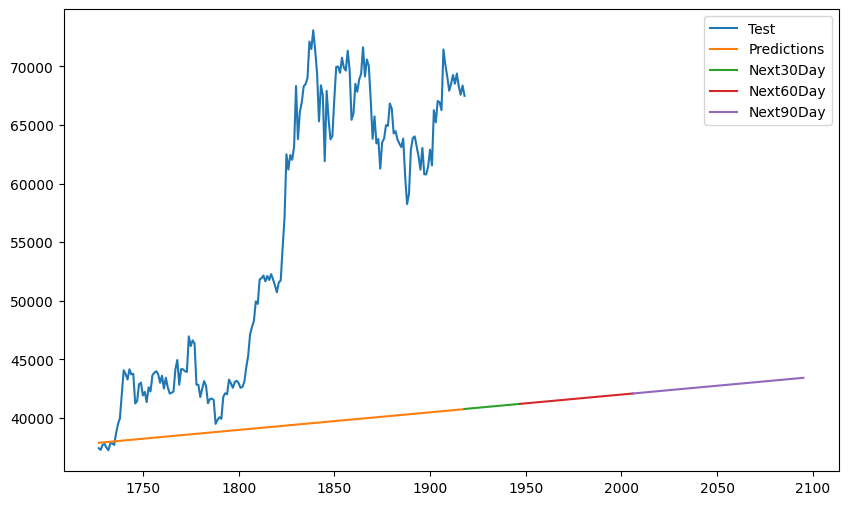

In [11]:
#Vẽ hình
plt.figure(figsize=(10, 6))
# plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_30_data,y_next_30_days)
plt.plot(last_60_data,y_next_60_days)
plt.plot(last_90_data,y_next_90_days)
plt.legend(['Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()